1.Loading and Displaying Datasets from Google Drive

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())




Mounted at /content/drive
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0 

2.Baseline Model Training Tuning

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())

# Data Preprocessing for heart.csv dataset
# Separate features and target from the heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])  # Assuming 'target' is the label column in heart.csv
y_csv = heart_csv['target']

# One-hot encode categorical features if needed
X_csv = pd.get_dummies(X_csv, drop_first=True)

# Standardize the dataset
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)

# Split dataset into train and test sets
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Baseline model training
# Train Random Forest on heart.csv data (Baseline model)
rf_csv = RandomForestClassifier(random_state=42)
rf_csv.fit(X_csv_train, y_csv_train)
y_csv_pred = rf_csv.predict(X_csv_test)

print("Baseline Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred))

# Hyperparameter tuning using GridSearchCV
# Define the model and hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20],      # Depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_csv_train, y_csv_train)

# Output the best parameters and evaluate the optimized model
best_model = grid_search.best_estimator_
y_csv_pred_optimized = best_model.predict(X_csv_test)

print("\nOptimized Model Results on heart.csv dataset:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_optimized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_optimized))

# Optionally, use RandomizedSearchCV if the parameter grid is very large
param_dist = {
    'n_estimators': [int(x) for x in range(50, 200)],  # Random selection of number of trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [int(x) for x in range(2, 15)]  # Random selection for minimum samples to split
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_csv_train, y_csv_train)

# Output the best parameters from RandomizedSearchCV
y_csv_pred_randomized = random_search.best_estimator_.predict(X_csv_test)

print("\nOptimized Model Results using RandomizedSearchCV on heart.csv dataset:")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_randomized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_randomized))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0  

3.Heart Disease Prediction - Model Training and Hyperparameter Tuning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0  

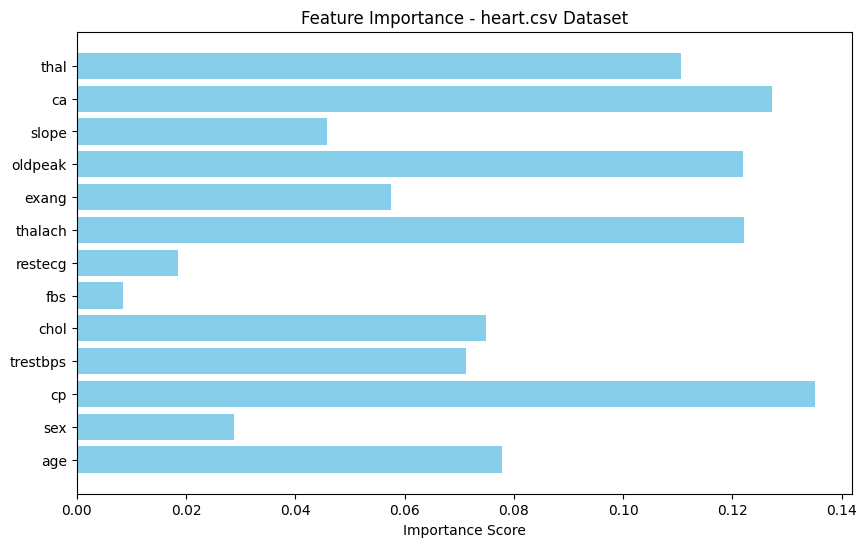

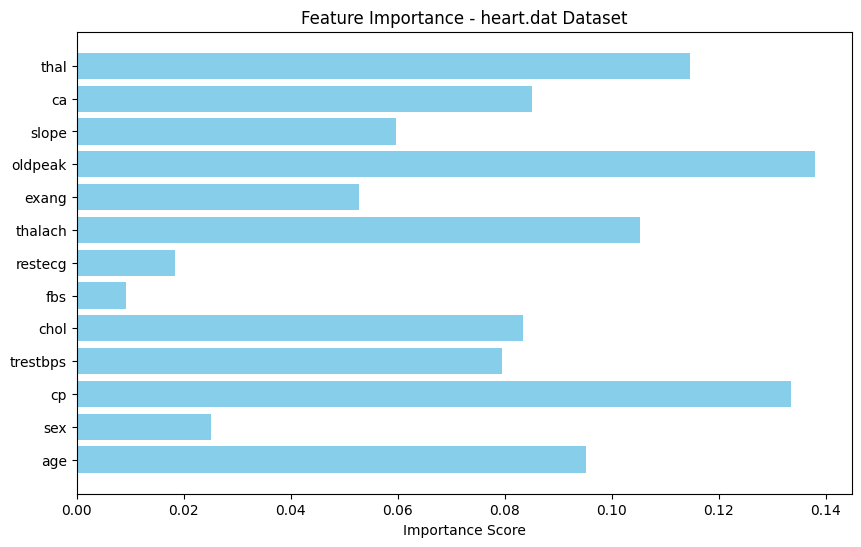


Logistic Regression Results on heart.csv dataset:
Accuracy: 0.7951219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Logistic Regression Results on heart.dat dataset:
Accuracy: 0.9074074074074074
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:

# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())

# Data Preprocessing for heart.csv dataset
# Separate features and target from the heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])  # Assuming 'target' is the label column in heart.csv
y_csv = heart_csv['target']

# One-hot encode categorical features if needed
X_csv = pd.get_dummies(X_csv, drop_first=True)

# Standardize the dataset
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)

# Split dataset into train and test sets
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Data Preprocessing for heart.dat dataset
# Separate features and target from the heart.dat dataset
X_dat = heart_dat.drop(columns=['target'])
y_dat = heart_dat['target']

# One-hot encode categorical features if needed
X_dat = pd.get_dummies(X_dat, drop_first=True)

# Standardize the dataset
X_dat = scaler.fit_transform(X_dat)

# Split dataset into train and test sets
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Baseline model training on heart.csv
rf_csv = RandomForestClassifier(random_state=42)
rf_csv.fit(X_csv_train, y_csv_train)
y_csv_pred = rf_csv.predict(X_csv_test)

print("\nBaseline Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred))

# Hyperparameter tuning using GridSearchCV on heart.csv
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20],      # Depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_csv_train, y_csv_train)

best_model = grid_search.best_estimator_
y_csv_pred_optimized = best_model.predict(X_csv_test)

print("\nOptimized Model Results on heart.csv dataset:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_optimized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_optimized))

# RandomizedSearchCV on heart.csv
dat_param_dist = {
    'n_estimators': [int(x) for x in range(50, 200)],  # Random selection of number of trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [int(x) for x in range(2, 15)]  # Random selection for minimum samples to split
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=dat_param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_csv_train, y_csv_train)

y_csv_pred_randomized = random_search.best_estimator_.predict(X_csv_test)

print("\nOptimized Model Results using RandomizedSearchCV on heart.csv dataset:")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_randomized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_randomized))

# Baseline model training on heart.dat
rf_dat = RandomForestClassifier(random_state=42)
rf_dat.fit(X_dat_train, y_dat_train)
y_dat_pred = rf_dat.predict(X_dat_test)

print("\nBaseline Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred))

# Hyperparameter tuning using GridSearchCV on heart.dat
grid_search_dat = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dat.fit(X_dat_train, y_dat_train)

best_model_dat = grid_search_dat.best_estimator_
y_dat_pred_optimized = best_model_dat.predict(X_dat_test)

print("\nOptimized Model Results on heart.dat dataset:")
print("Best Parameters:", grid_search_dat.best_params_)
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred_optimized))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred_optimized))

# Cross-validation for heart.csv
dat_cv_scores = cross_val_score(rf_csv, X_csv, y_csv, cv=5, scoring='accuracy')
print("\nCross-Validation Results on heart.csv dataset:")
print("Accuracy Scores for each fold:", dat_cv_scores)
print("Mean Accuracy:", dat_cv_scores.mean())
print("Standard Deviation:", dat_cv_scores.std())

# Cross-validation for heart.dat
dat_cv_scores_dat = cross_val_score(rf_dat, X_dat, y_dat, cv=5, scoring='accuracy')
print("\nCross-Validation Results on heart.dat dataset:")
print("Accuracy Scores for each fold:", dat_cv_scores_dat)
print("Mean Accuracy:", dat_cv_scores_dat.mean())
print("Standard Deviation:", dat_cv_scores_dat.std())

# Feature Importance for heart.csv
importances = rf_csv.feature_importances_
features = heart_csv.drop(columns=['target']).columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - heart.csv Dataset')
plt.show()

# Feature Importance for heart.dat
importances_dat = rf_dat.feature_importances_
features_dat = heart_dat.drop(columns=['target']).columns
plt.figure(figsize=(10, 6))
plt.barh(features_dat, importances_dat, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - heart.dat Dataset')
plt.show()

# Logistic Regression on heart.csv
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_csv_train, y_csv_train)
y_csv_log_pred = log_reg.predict(X_csv_test)

print("\nLogistic Regression Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_log_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_log_pred))

# Logistic Regression on heart.dat
log_reg_dat = LogisticRegression(max_iter=1000, random_state=42)
log_reg_dat.fit(X_dat_train, y_dat_train)
y_dat_log_pred = log_reg_dat.predict(X_dat_test)

print("\nLogistic Regression Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_log_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_log_pred))


Deep Learning Model - MLP for datasets

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load heart.csv dataset
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
heart_csv = pd.read_csv(csv_file_path)

# Separate features and target from the heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])  # Assuming 'target' is the label column in heart.csv
y_csv = heart_csv['target']

# One-hot encode categorical features if needed
X_csv = pd.get_dummies(X_csv, drop_first=True)

# Standardize the dataset
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)

# Split dataset into train and test sets
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Step 4a: Deep Learning Model - MLP for heart.csv dataset
# Define the MLP model for heart.csv
mlp_model_csv = Sequential([
    Dense(128, activation='relu', input_shape=(X_csv_train.shape[1],)),  # First hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
mlp_model_csv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model_csv.fit(X_csv_train, y_csv_train, epochs=50, batch_size=16, validation_data=(X_csv_test, y_csv_test))

# Predict using the test set
y_pred_prob_csv = mlp_model_csv.predict(X_csv_test)
y_mlp_pred_csv = (y_pred_prob_csv > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate model performance
print("\nDeep Learning MLP Model Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_mlp_pred_csv))
print("Classification Report:\n", classification_report(y_csv_test, y_mlp_pred_csv))

# Load heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)

# Separate features and target from the heart.dat dataset
X_dat = heart_dat.drop(columns=['target'])
y_dat = heart_dat['target']

# One-hot encode categorical features if needed
X_dat = pd.get_dummies(X_dat, drop_first=True)

# Standardize the dataset
X_dat = scaler.fit_transform(X_dat)

# Split dataset into train and test sets
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Step 4b: Deep Learning Model - MLP for heart.dat dataset
# Define the MLP model for heart.dat
mlp_model_dat = Sequential([
    Dense(128, activation='relu', input_shape=(X_dat_train.shape[1],)),  # First hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
mlp_model_dat.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model_dat.fit(X_dat_train, y_dat_train, epochs=50, batch_size=16, validation_data=(X_dat_test, y_dat_test))

# Predict using the test set
y_pred_prob_dat = mlp_model_dat.predict(X_dat_test)
y_mlp_pred_dat = (y_pred_prob_dat > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate model performance
print("\nDeep Learning MLP Model Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_mlp_pred_dat))
print("Classification Report:\n", classification_report(y_dat_test, y_mlp_pred_dat))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6936 - loss: 0.5816 - val_accuracy: 0.8098 - val_loss: 0.4228
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3280 - val_accuracy: 0.8146 - val_loss: 0.3890
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3115 - val_accuracy: 0.8244 - val_loss: 0.3753
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2306 - val_accuracy: 0.8585 - val_loss: 0.3346
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2368 - val_accuracy: 0.8634 - val_loss: 0.3152
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 0.1948 - val_accuracy: 0.8732 - val_loss: 0.2867
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1613 - val_accuracy: 0.8976 - val_loss: 0.2632
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 0.1736 - val_accuracy: 0.8732 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4275 - loss: 0.5057 - val_accuracy: 0.6111 - val_loss: -0.3590
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: -0.7966 - val_accuracy: 0.6111 - val_loss: -1.3324
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5462 - loss: -2.1147 - val_accuracy: 0.6111 - val_loss: -2.5682
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: -4.1136 - val_accuracy: 0.6111 - val_loss: -4.4690
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: -7.2346 - val_accuracy: 0.6111 - val_loss: -7.5055
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5748 - loss: -10.9362 - val_accuracy: 0.6111 - val_loss: -12.1028
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5309 - loss: -20.3487 - val_accuracy: 0.6111 - val_loss: -19.4096
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: -29.4684 - val_accuracy: 0.6111 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Training and Evaluation

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load heart.csv dataset
heart_csv = pd.read_csv('/content/drive/My Drive/ML_Project/heart.csv')
X_csv = heart_csv.drop(columns=['target'])  # Features
y_csv = heart_csv['target']  # Target

# Standardize the features for heart.csv
scaler_csv = StandardScaler()
X_csv = scaler_csv.fit_transform(X_csv)

# Split dataset into training and testing sets for heart.csv
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Train SVM on heart.csv dataset
svm_csv = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel
svm_csv.fit(X_csv_train, y_csv_train)
y_csv_svm_pred = svm_csv.predict(X_csv_test)

# Evaluate the SVM model on heart.csv
print("\nSVM Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_svm_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_svm_pred))


# Load heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv('/content/drive/My Drive/ML_Project/heart.dat', sep='\s+', header=None, names=columns)
X_dat = heart_dat.drop(columns=['target'])  # Features
y_dat = heart_dat['target']  # Target

# Standardize the features for heart.dat
scaler_dat = StandardScaler()
X_dat = scaler_dat.fit_transform(X_dat)

# Split dataset into training and testing sets for heart.dat
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Train SVM on heart.dat dataset
svm_dat = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel
svm_dat.fit(X_dat_train, y_dat_train)
y_dat_svm_pred = svm_dat.predict(X_dat_test)

# Evaluate the SVM model on heart.dat
print("\nSVM Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_svm_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_svm_pred))



SVM Results on heart.csv dataset:
Accuracy: 0.8878048780487805
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205


SVM Results on heart.dat dataset:
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

